## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [ ]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


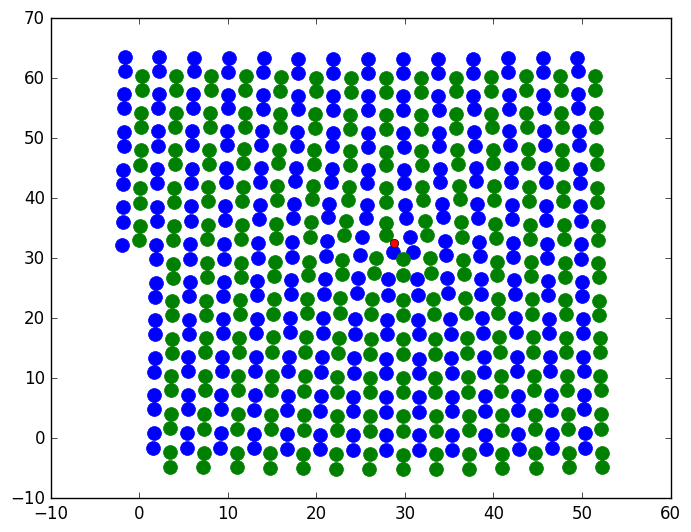

616-element Array{StaticArrays.SVector{3,Float64},1}:
 [1.60215,-1.51358,0.0]    
 [3.46277,-4.70601,1.10839]
 [1.6268,0.869015,0.0]     
 [3.48873,-2.314,1.10839]  
 [1.66715,4.8294,0.0]      
 [3.53274,1.6666,1.10839]  
 [1.69058,7.19785,0.0]     
 [3.55905,4.04924,1.10839] 
 [1.72803,11.1305,0.0]     
 [3.60174,8.00692,1.10839] 
 [1.74963,13.4811,0.0]     
 [3.62633,10.372,1.10839]  
 [1.78488,17.3849,0.0]     
 ⋮                         
 [49.6865,48.8766,0.0]     
 [51.662,45.7155,1.10839]  
 [49.6544,51.2032,0.0]     
 [51.6348,48.0657,1.10839] 
 [49.5989,55.0583,0.0]     
 [51.5871,51.9591,1.10839] 
 [49.5653,57.3617,0.0]     
 [51.5572,54.2821,1.10839] 
 [49.511,61.1926,0.0]      
 [51.5059,58.1368,1.10839] 
 [49.4803,63.4899,0.0]     
 [51.4752,60.4426,1.10839] 

In [2]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")
positions(at)

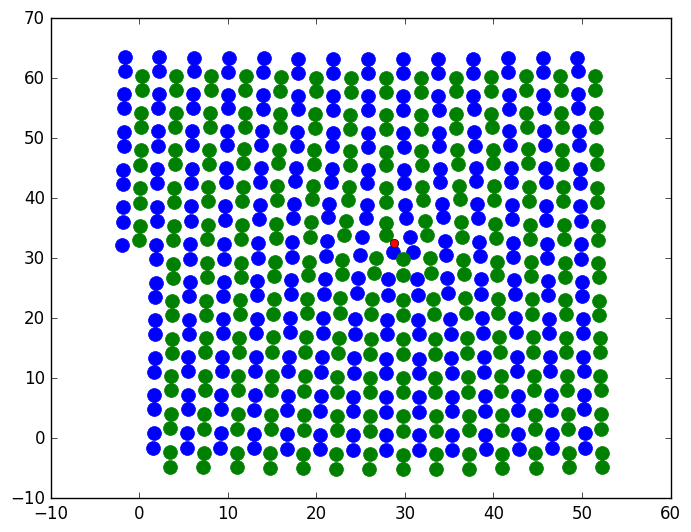

616-element Array{StaticArrays.SVector{3,Float64},1}:
 [1.60215,-1.51358,0.0]    
 [3.46277,-4.70601,1.10839]
 [1.6268,0.869015,0.0]     
 [3.48873,-2.314,1.10839]  
 [1.66715,4.8294,0.0]      
 [3.53274,1.6666,1.10839]  
 [1.69058,7.19785,0.0]     
 [3.55905,4.04924,1.10839] 
 [1.72803,11.1305,0.0]     
 [3.60174,8.00692,1.10839] 
 [1.74963,13.4811,0.0]     
 [3.62633,10.372,1.10839]  
 [1.78488,17.3849,0.0]     
 ⋮                         
 [49.6865,48.8766,0.0]     
 [51.662,45.7155,1.10839]  
 [49.6544,51.2032,0.0]     
 [51.6348,48.0657,1.10839] 
 [49.5989,55.0583,0.0]     
 [51.5871,51.9591,1.10839] 
 [49.5653,57.3617,0.0]     
 [51.5572,54.2821,1.10839] 
 [49.511,61.1926,0.0]      
 [51.5059,58.1368,1.10839] 
 [49.4803,63.4899,0.0]     
 [51.4752,60.4426,1.10839] 

In [6]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")
positions(at)

In [54]:
using JuLIP.Solve: minimise!
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 7.1, truncate=false, cle=:anisotropic, calc = calc)
set_constraint!(at, FixedCell(at))
set_calculator!(at, calc)
relaxed = minimise!(at)
X = positions(at) |> mat
#x, y, z = X[1,:], X[2,:], X[3,:] 
#I0 = find(X[3,:] .< 0)
#I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "g.", markersize=20)
#plot(x[I1], y[I1], "g.", markersize=20)
#plot([xcore[1]], [xcore[2]], "ro")
F = forces(at)
print(F)

Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [1.6028134295368943,-1.6187822077619387, ...]
 * Minimizer: [0.8346395162890043,-1.0496851547393036, ...]
 * Minimum: -3.127048e+03
 * Iterations: 277
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-06: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 840
 * Gradient Calls: 563
StaticArrays.SVector{3,Float64}[[-0.0073115,0.0658825,-0.0257869],[0.0391886,0.0129588,-0.0138027],[0.0244989,-0.0568124,0.0285036],[0.0275711,0.0300825,0.032952],[0.0418708,-0.00163761,0.0296258],[-0.0473411,-0.0555603,0.0191093],[-0.024211,0.0334838,-0.00310532],[-0.0254568,0.0526033,-0.0445423],[0.00474657,-0.0064218,0.00274979],[-0.0196025,-0.0121171,2.49934e-5],[0.0508045,-0.00244533,-0.00177188],[-0.021437,-0.000426275,0.0164222],[0.0397229,-0.0120248,0.00800401],[-0.00958651,0.0345232,0.00539566],[-0.0354517,0.012104,-0

In [26]:
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc)
set_calculator!(at, calc)
print(xcore)
xcore = [28.7969,32.63,0]
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
z = r[5:22]
w = f[5:22]
(log(w[5])-log(w[1]))/(log(z[5])-log(z[1]))

[28.7969,32.63]

-1.6870584836147189

In [14]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

In [38]:
E = eye(3)
X = [1 2 3; 4 5 6; 0 0 0]
[:,1]

3-element Array{Int64,1}:
 1
 4
 0

In [43]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
atu = set_pbc!(bulk("Al", cubic=true) * 2, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

6×6 Array{Float64,2}:
  6.479   3.227   3.227  -0.0     0.0    -0.0  
  3.227   6.479   3.227  -0.0    -0.0     0.0  
  3.227   3.227   6.479  -0.0     0.0    -0.0  
  0.0    -0.0    -0.0     4.212  -0.0    -0.0  
  0.0     0.0     0.0    -0.0     4.212   0.0  
 -0.0    -0.0    -0.0    -0.0     0.0     4.212

In [28]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

1.6260000000000001
for isotropy, this number should match Cvoigt[6,6] = 4.212


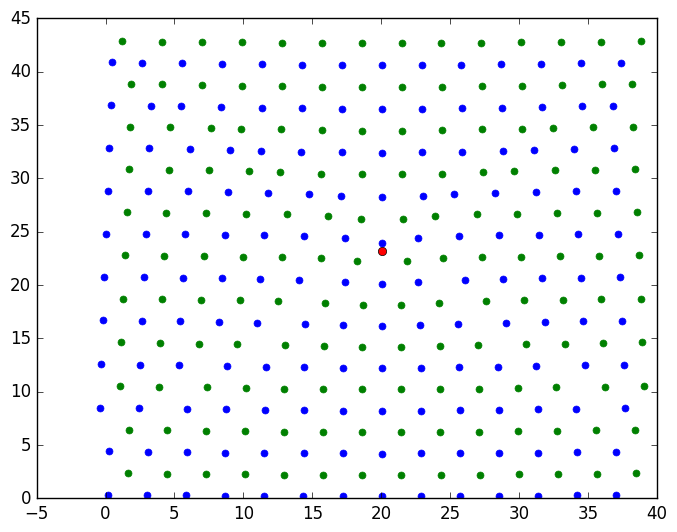

[9.06513 3.22679 0.640383 9.04038e-12 2.31394e-11 5.09541e-12; 3.22679 6.47872 3.22679 1.95123e-11 1.85895e-11 -2.50376e-11; 0.640383 3.22679 9.06513 4.03481e-12 1.6125e-11 9.85372e-12; -1.97975e-13 -1.15648e-11 -8.70597e-12 4.21237 3.65517e-11 5.23295e-12; 3.23239e-11 1.7435e-11 1.84599e-11 2.95573e-11 1.62596 2.21326e-11; -1.33424e-11 -6.62897e-11 -1.42423e-11 2.36874e-11 1.03838e-11 4.21237](λ,ϕ) = (1.0876050097921104,0.9521339217080068)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4bfc446c50>

In [54]:
reload("MaterialsScienceTools")
Dis = MaterialsScienceTools.Dislocations
calc = lennardjones(r0=rnn("Al"))
at, xcore = Dis.fcc_edge_geom("Al", 5.1, truncate=false, cle=:anisotropic, calc=calc, TOL=1e-4)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")

In [8]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

1.6260000000000001

In [9]:
MaterialsScienceTools.Dislocations.u_edge([], [], 1.0, Cv)

10.82(λ,ϕ) = (1.0,1.1890457085836792)


LoadError: LoadError: MethodError: no method matching atan(::Array{Any,1})
Closest candidates are:
  atan(!Matched::BigFloat) at mpfr.jl:610
  atan(!Matched::Complex{Float16}) at math.jl:480
  atan(!Matched::Float16) at math.jl:479
  ...
while loading In[9], in expression starting on line 1

In [67]:
pi/2

1.5707963267948966